In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap

In [2]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *

In [3]:
from TO_sim.For_ensemble.for_221220 import get_tr
from TO_sim.Utility import Create_Folder

In [4]:
N = 500
seed = 'uniform'
theta_init, omega_init, Kc = Identical(N, 0, seed=seed)
dtheta_init = 0*np.random.random(N)
K = 0.1
m = 3
t_end = 5000
dt = 0.1

In [6]:
DF = 'Review/22.12.20/'
Create_Folder(DF)

In [7]:
import multiprocessing as mp
core = mp.cpu_count()

In [8]:
Ks = np.logspace(np.log10(1e-5),np.log10(1),10)
Ks

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00])

In [10]:
Ks = np.logspace(np.log10(1e-4),np.log10(10),5)
Ks

array([1.00000000e-04, 1.77827941e-03, 3.16227766e-02, 5.62341325e-01,
       1.00000000e+01])

In [11]:
Ks = np.logspace(np.log10(1e-3),np.log10(1),10)


# Ks = np.arange(0.1,1.05,0.1)
ms = np.arange(0,24+0.5/2,0.5)
IDX1 = [K for K in Ks for _ in range(len(ms))]
IDX2 = [m for _ in range(len(Ks)) for m in ms ]
IDX = [IDX1,IDX2]
df = pd.DataFrame(np.random.rand(len(Ks)*len(ms),2), index=IDX,columns=['t','r'],dtype=object)
seed = 10
initial_frequecny = 0
for K in tqdm(Ks):
    for m,(df.loc[K,m].t,df.loc[K,m].r) in zip(ms,parmap.map(get_tr,ms,t_end=t_end,K=K,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=False)):pass

  0%|          | 0/10 [00:00<?, ?it/s]

t  \
0.1 0.0   [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    0.5   [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    1.0   [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    1.5   [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    2.0   [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
...                                                     ...   
1.0 22.0  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    22.5  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    23.0  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    23.5  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   
    24.0  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...   

                                                          r  
0.1 0.0   [0.01999916553513436, 0.020099098093788178, 0....  
    0.5   [0.01999916553513436, 0.02000850343627637, 0.0...  
    1.0   [0.01999916553513436, 0.020003987958818536, 0....  
    1.5   [0.01999916553513436, 0.020002415820068623, 0....  
    2.0   [0.01999916553513436, 0.020001616672828126, 0....  
...                                                     ...  
1.0 22.0  [0.01999916553513436, 0.02000142769624525, 0.0...  
    22.5  [0.01999916553513436, 0.020001377499489905, 0....  
    23.0  [0.01999916553513436, 0.020001329482079826, 0....  
    23.5  [0.01999916553513436, 0.02000128350510268, 0.0...  
    24.0  [0.01999916553513436, 0.02000123944120635, 0.0...  

[490 rows x 2 columns]

In [11]:
ms = np.arange(0,24+0.5/2,0.5)
df = pd.DataFrame(t={},r={},index =[0.1,0.2,0.3,0.4,0.5])
ts_01 = {}
rs_01 = {}
ts_05 = {}
rs_05 = {}
seed = 10
initial_frequecny = 0
for m,
for m,(ts_01[m],rs_01[m]) in zip(ms,parmap.map(get_tr,ms,K=K,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=True)):pass
for m,(ts_05[m],rs_05[m]) in zip(ms,parmap.map(get_tr,ms,K=0.5,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=True)):pass
# for m in tqdm(ms):
#     ts[m],rs[m]=get_tr(m,K)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [11]:
%timeit get_tr(m,K,1,0)

995 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
df.loc[K].t.values.shape

(49,)

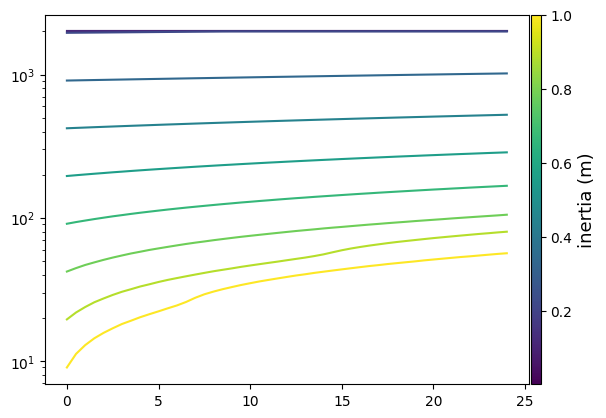

In [26]:
t_K_09 = {}
for K in Ks:
    temp = []
    for m,t,r in zip(ms,df.loc[K].t.values,df.loc[K].r.values):
        idx = np.searchsorted(r,0.9)
        temp.append(t[idx-1])
    t_K_09[K]=temp
color_ = np.linspace(0,1,len(Ks),endpoint=True)
color = plt.cm.viridis(color_)
fig, ax1 = plt.subplots(1)
sca = plt.scatter(0*Ks,0*Ks,c=Ks,s=0)

for i,K in enumerate(Ks):
    plt.plot(ms,t_K_09[K],color=color[i])
plt.yscale('log')


divider3 = make_axes_locatable(ax1)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar = fig.colorbar(sca, cax=cax)
cbar.set_label('inertia (m)',fontsize=13)

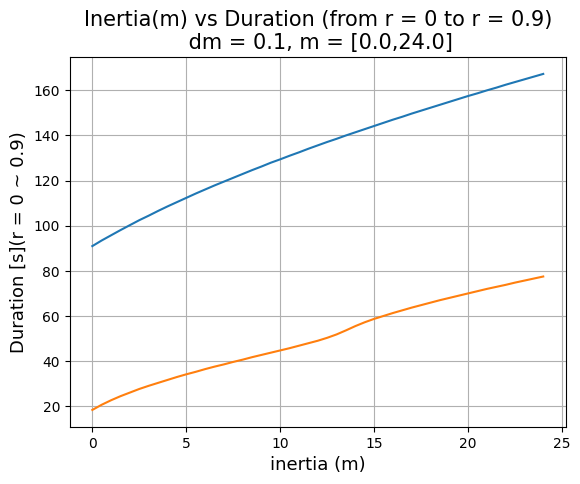

In [12]:
t_01_09 = []
t_05_09 = []
for m,t,r in zip(ms,ts_01.values(),rs_01.values()):
    idx = np.searchsorted(r,0.9)
    t_01_09.append(t[idx])

for m,t,r in zip(ms,ts_05.values(),rs_05.values()):
    idx = np.searchsorted(r,0.9)
    t_05_09.append(t[idx])
plt.plot(ms,t_01_09)
plt.plot(ms,t_05_09)
plt.xlabel('inertia (m)',fontsize=13)
plt.ylabel('Duration [s](r = 0 ~ 0.9)',fontsize=13)
plt.title('Inertia(m) vs Duration (from r = 0 to r = 0.9)'+f'\n dm = 0.1, m = [{ms[0]},{ms[-1]}]',fontsize=15)
plt.grid()

# plt.savefig(DF+f'Inertia vs Duration dm = 0.1, m = [{ms[0]},{ms[-1]}].png',dpi=400)

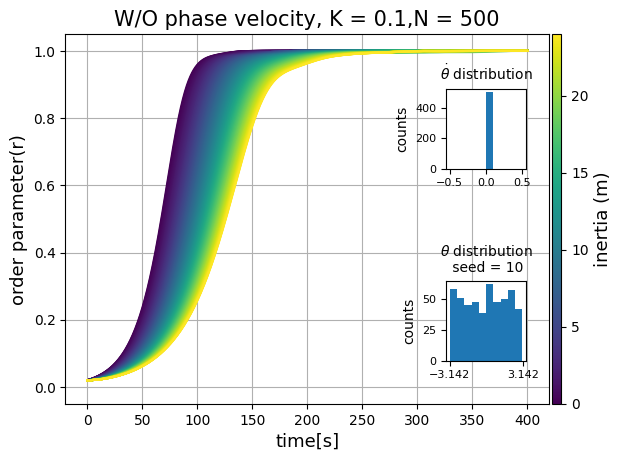

In [90]:
fig = plt.figure(facecolor='white')
ax1 = plt.subplot(111)
color_idx = np.linspace(0.0,1,len(ms))
color = plt.cm.viridis(color_idx)
sca = plt.scatter(0*ms,0*ms,s=0,c=ms)
for i,(t,r) in enumerate(zip(ts.values(),rs.values())):
    plt.plot(t,r,color=color[i],alpha=1)
# plt.xscale('log')
plt.yscale('log')
plt.title(f'W/O phase velocity, K = {K},N = {N}',fontsize=15)
plt.grid()
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('order parameter(r)',fontsize=13)
fig.add_axes([0.72, 0.2, 1/8, 1/6]) 
plt.hist(theta_init)
plt.xticks([-np.pi,np.pi])
plt.title(r'$\theta$ distribution'+f'\n seed = {seed}',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

ax=fig.add_axes([0.72, 0.6, 1/8, 1/6]) 
ax.set_facecolor('white')
plt.hist(dtheta_init)
plt.title(r'$\dot{\theta}$ distribution',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

divider3 = make_axes_locatable(ax1)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar = fig.colorbar(sca, cax=cax)
cbar.set_label('inertia (m)',fontsize=13)

plt.savefig(DF+f'Identical oscillator linear-log without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
ax1.set_yscale('linear')
plt.savefig(DF+f'Identical oscillator without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
# plt.scatter(np.sin(theta_init[::]),np.cos(theta_init[::]),alpha=0.5,s=5)
